In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [47]:
import numpy as np
import pandas as pd

data=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [48]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
data.shape

(400, 9)

# 1. Droping Unwanted Columns 

In [50]:
data.drop('Serial No.',axis=1,inplace=True)

In [51]:
data.shape

(400, 8)

# Checking for null values

In [52]:
data.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Normalizing the values

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [53]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Plotting between Dependent and independent variables

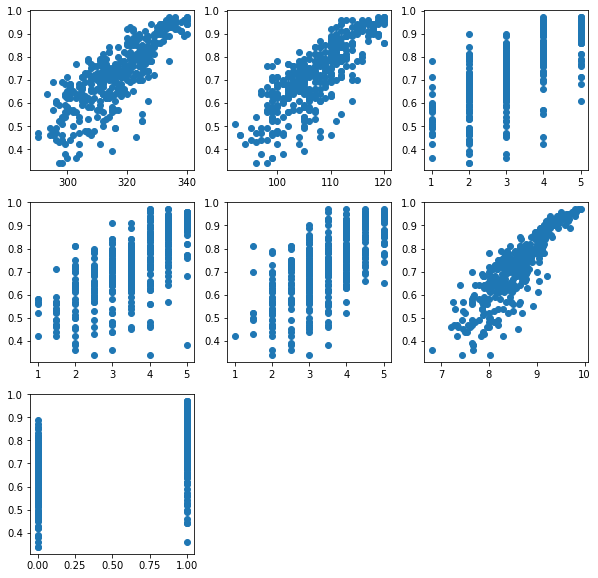

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
i=331;
for z in x:
    plt.subplot(i)
    i=i+1
    plt.scatter(x[z],y)

# Checking outliers

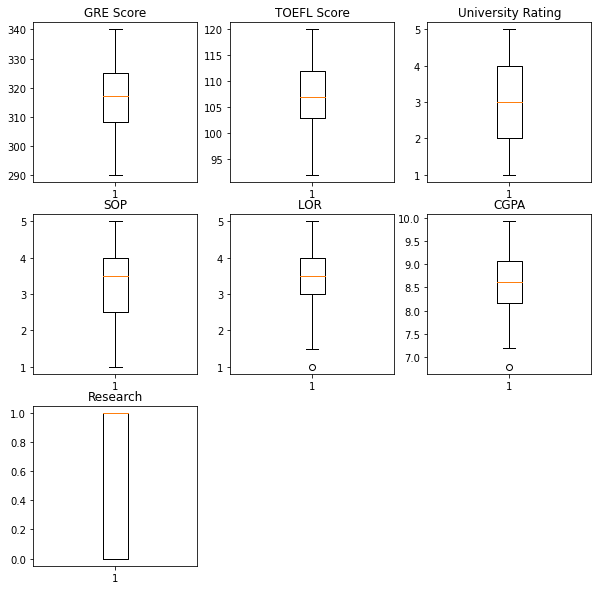

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
i=331;
for z in x:
    plt.subplot(i)
    i=i+1
    plt.boxplot(x[z])
    plt.title(z)

In [56]:
x.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


#  Using PCA

from sklearn.decomposition import PCA
cols=data.columns
pca=PCA(n_components=6)
x=pca.fit_transform(x)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [58]:
x_train.shape

(320, 7)

In [59]:
x_test.shape

(80, 7)

#     USING LINEAR REGRESSION

In [60]:
from sklearn.linear_model import LinearRegression

M1=LinearRegression()
M1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:

y_pred= M1.predict(x_test)

In [62]:
from sklearn import metrics
def errors(y_test,y_pred):
    print('MAE is',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE is',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE is',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('R2 score is',metrics.r2_score(y_test,y_pred))


In [63]:
print("LINEAR REGRESSION")
errors(y_test,y_pred)

LINEAR REGRESSION
MAE is 0.04495779899577675
MSE is 0.004442679729994745
RMSE is 0.06665342999422269
R2 score is 0.80790436770201


# USING DECISION TREE

In [64]:
from sklearn import tree

m2=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=1)
m2.fit(x_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [65]:
y_pred= m2.predict(x_test)

In [66]:
print("DECISION TREE")

errors(y_test,y_pred)

DECISION TREE
MAE is 0.05801653126226336
MSE is 0.006768528556293033
RMSE is 0.08227106755289512
R2 score is 0.7073377214275022


# USING RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestRegressor

m3=RandomForestRegressor(max_depth=8,n_estimators=300,random_state=1)
m3.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [68]:
y_pred= m2.predict(x_test)

In [69]:
print("RANDOM FOREST REGRESSOR")
errors(y_test,y_pred)

RANDOM FOREST REGRESSOR
MAE is 0.05801653126226336
MSE is 0.006768528556293033
RMSE is 0.08227106755289512
R2 score is 0.7073377214275022


In [70]:
m3.feature_importances_

array([0.06117207, 0.03333265, 0.01522311, 0.02546418, 0.02437665,
       0.83200558, 0.00842576])

In [71]:
data.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [72]:
y.mean()

0.7243499999999996